In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('C:/Users/acc_a/OneDrive/PhOLED 300.xlsx', sheetname='Sheet2')
df = df[list(df.columns)[1:] ]
df.dropna(axis=0, inplace=True)

X = df[list(df.columns)[:-1]]
y = df[['cd/A']]

X.shape

(304, 31)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

filename = 'C:/Anaconda3/projects/oled/PhOLED 300/rforest_300.sav'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

print('R-squared: ', loaded_model.score(X_test, y_test))

R-squared:  0.895240129661


### vary triplet level

In [3]:
new_df = pd.read_pickle('C:/Anaconda3/projects/oled/vary triplet/triplet.pkl')

new_X = new_df[:]
print(new_X.shape)

y_pred = loaded_model.predict(new_X)
y_pred = [round(float(i), 2) for i in y_pred]

new_X['cd/a'] = y_pred

triplet3 = new_X.loc[new_X['triplet_HOST'] == 3]
triplet3['cd/a'].shape

(348840, 31)


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(38760,)

In [4]:
new_df.iloc[:, 12:].describe()

,triplet_HTL,LUMO_EML,HOMO_EML,triplet_HOST,thickness_EML,lumo_dopant,homo_dopant,triplet_dopant,dopant_percentage,triplet_ETL,total ETL,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,wf_1,thickness_EIL
count,348840.00000,348840.000000,348840.000000,348840.000000,348840.0,348840.0,3.488400e+05,3.488400e+05,348840.0,348840.000000,348840.0,348840.000000,348840.000000,348840.0,348840.000000,348840.000000,348840.0,348840.000000,348840.000000
mean,2.76250,2.418824,5.907647,2.834314,20.0,3.0,5.700000e+00,2.700000e+00,10.0,2.801579,35.0,2.839474,6.517368,0.0,2.839474,6.517368,35.0,3.326667,0.666667
std,0.22027,0.250738,0.417254,0.116831,0.0,0.0,3.212102e-11,1.607117e-11,0.0,0.225838,0.0,0.326617,0.406369,0.0,0.326617,0.406369,0.0,0.857957,0.471405
min,2.30000,2.020000,5.560000,2.640000,20.0,3.0,5.700000e+00,2.700000e+00,10.0,2.500000,35.0,2.260000,5.850000,0.0,2.260000,5.850000,35.0,2.200000,0.000000
25%,2.64750,2.280000,5.710000,2.750000,20.0,3.0,5.700000e+00,2.700000e+00,10.0,2.690000,35.0,2.600000,6.130000,0.0,2.600000,6.130000,35.0,2.200000,0.000000
50%,2.83500,2.400000,5.850000,2.850000,20.0,3.0,5.700000e+00,2.700000e+00,10.0,2.750000,35.0,2.750000,6.500000,0.0,2.750000,6.500000,35.0,3.500000,1.000000
75%,2.94000,2.460000,5.900000,2.940000,20.0,3.0,5.700000e+00,2.700000e+00,10.0,2.800000,35.0,3.000000,6.800000,0.0,3.000000,6.800000,35.0,4.280000,1.000000
max,3.00000,3.000000,7.500000,3.100000,20.0,3.0,5.700000e+00,2.700000e+00,10.0,3.400000,35.0,3.500000,7.500000,0.0,3.500000,7.500000,35.0,4.280000,1.000000


In [5]:
column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

In [6]:
def layer(name): 
    column = name
    HTL = {'50': device50[column], '45': device45[column] , '40': device40[column] , '35': device35[column] , 
           '30': device30[column] , '25': device25[column], '20': device20[column], '15': device15[column], 
           '10': device10[column], 
           '0': device[column]}
    sequence = ['50', '45', '40', '35', '30', '25', '20', '15', '10', '0']
    df = pd.DataFrame(data=HTL).reindex(columns=sequence)

    # boxplot
    f, ax = plt.subplots(figsize=(12, 10))
    fig = sns.boxplot(data=df)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(name, fontsize=20);
    return df.describe()

## 1st trio, triplet energy

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,1.360000e+02,7971.000000,13797.000000,4429.000000,5801.000000,6622.000000,4.0
mean,NaN,NaN,NaN,2.800000e+00,2.899733,2.852424,2.626471,2.507176,2.724112,2.3
std,NaN,NaN,NaN,7.131695e-15,0.089009,0.141478,0.216096,0.193313,0.241193,0.0
min,NaN,NaN,NaN,2.800000e+00,2.580000,2.300000,2.300000,2.300000,2.300000,2.3
25%,NaN,NaN,NaN,2.800000e+00,2.800000,2.800000,2.580000,2.300000,2.580000,2.3
50%,NaN,NaN,NaN,2.800000e+00,2.940000,2.870000,2.580000,2.670000,2.800000,2.3
75%,NaN,NaN,NaN,2.800000e+00,2.940000,2.940000,2.870000,2.670000,2.940000,2.3
max,NaN,NaN,NaN,2.800000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,2.3


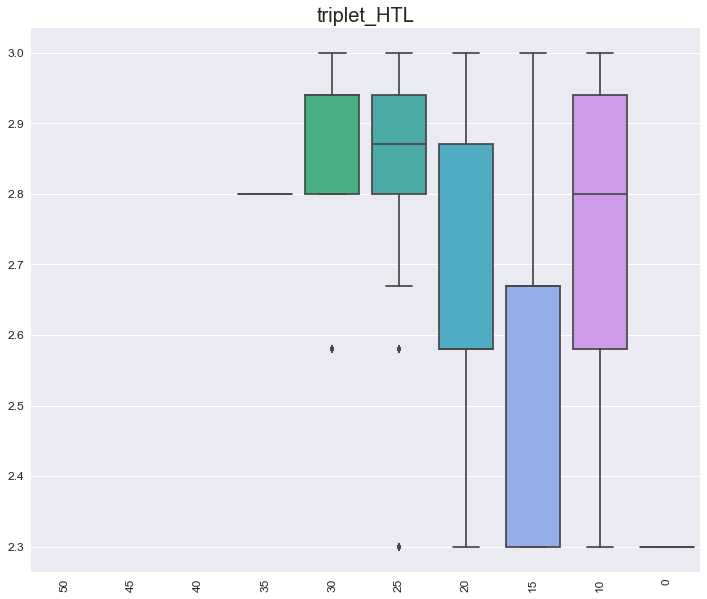

In [7]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,136.000000,7971.000000,13797.000000,4429.000000,5801.000000,6622.000000,4.00
mean,NaN,NaN,NaN,2.976103,2.932431,2.810882,2.825439,2.806816,2.600587,2.75
std,NaN,NaN,NaN,0.209204,0.272059,0.183932,0.194090,0.212171,0.106000,0.00
min,NaN,NaN,NaN,2.690000,2.690000,2.690000,2.690000,2.500000,2.500000,2.75
25%,NaN,NaN,NaN,2.800000,2.700000,2.700000,2.740000,2.700000,2.500000,2.75
50%,NaN,NaN,NaN,2.990000,2.800000,2.750000,2.750000,2.750000,2.600000,2.75
75%,NaN,NaN,NaN,2.990000,2.990000,2.800000,2.800000,2.800000,2.600000,2.75
max,NaN,NaN,NaN,3.400000,3.400000,3.400000,3.400000,3.400000,3.400000,2.75


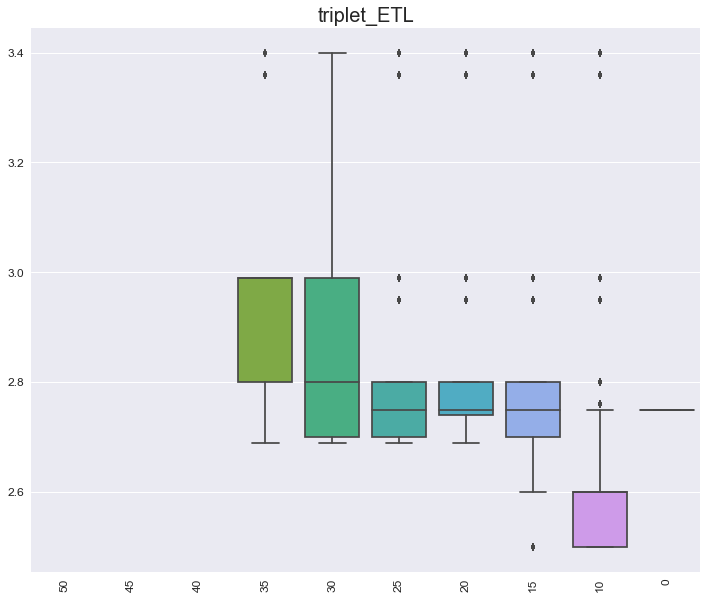

In [8]:
layer('triplet_ETL')

In [9]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.9]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]


,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,1221.000000,15744.000000,10498.000000,3407.000000,9578.000000,5152.000000,0.0
mean,NaN,NaN,NaN,2.902948,2.905484,2.803682,2.534458,2.560619,2.734472,NaN
std,NaN,NaN,NaN,0.087899,0.086445,0.158706,0.171250,0.231268,0.230440,NaN
min,NaN,NaN,NaN,2.800000,2.580000,2.300000,2.300000,2.300000,2.300000,NaN
25%,NaN,NaN,NaN,2.800000,2.870000,2.580000,2.300000,2.300000,2.580000,NaN
50%,NaN,NaN,NaN,2.940000,2.940000,2.870000,2.580000,2.670000,2.800000,NaN
75%,NaN,NaN,NaN,3.000000,2.940000,2.940000,2.670000,2.670000,2.940000,NaN
max,NaN,NaN,NaN,3.000000,3.000000,3.000000,2.940000,3.000000,3.000000,NaN


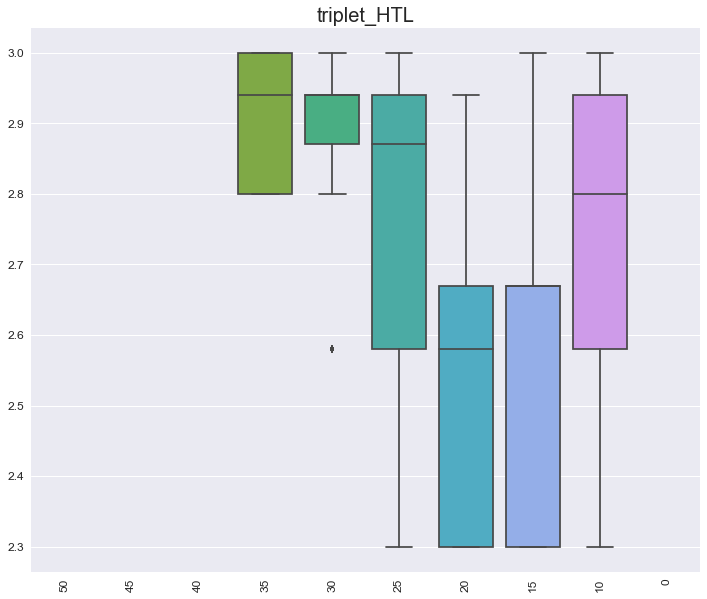

In [10]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,1221.000000,15744.000000,10498.000000,3407.000000,9578.000000,5152.000000,0.0
mean,NaN,NaN,NaN,2.951400,2.882322,2.791078,2.862797,2.743407,2.608389,NaN
std,NaN,NaN,NaN,0.199266,0.254073,0.148999,0.231343,0.208722,0.107746,NaN
min,NaN,NaN,NaN,2.690000,2.690000,2.690000,2.500000,2.500000,2.500000,NaN
25%,NaN,NaN,NaN,2.750000,2.700000,2.700000,2.700000,2.600000,2.500000,NaN
50%,NaN,NaN,NaN,2.990000,2.760000,2.750000,2.750000,2.700000,2.600000,NaN
75%,NaN,NaN,NaN,2.990000,2.950000,2.800000,2.950000,2.760000,2.600000,NaN
max,NaN,NaN,NaN,3.400000,3.400000,3.400000,3.400000,3.400000,3.400000,NaN


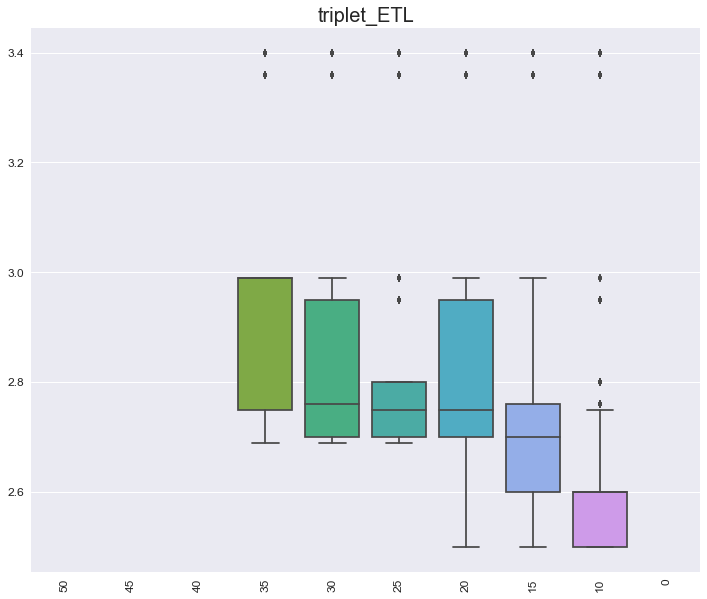

In [11]:
layer('triplet_ETL')

In [12]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.8]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,777.000000,14392.000000,9726.000000,3073.000000,7616.000000,5456.000000,0.0
mean,NaN,NaN,NaN,2.903655,2.905304,2.804019,2.523645,2.544102,2.731085,NaN
std,NaN,NaN,NaN,0.084829,0.085503,0.159716,0.162128,0.223682,0.234851,NaN
min,NaN,NaN,NaN,2.800000,2.580000,2.300000,2.300000,2.300000,2.300000,NaN
25%,NaN,NaN,NaN,2.800000,2.870000,2.580000,2.300000,2.300000,2.580000,NaN
50%,NaN,NaN,NaN,2.940000,2.940000,2.870000,2.580000,2.670000,2.800000,NaN
75%,NaN,NaN,NaN,3.000000,2.940000,2.940000,2.670000,2.670000,2.940000,NaN
max,NaN,NaN,NaN,3.000000,3.000000,3.000000,2.940000,3.000000,3.000000,NaN


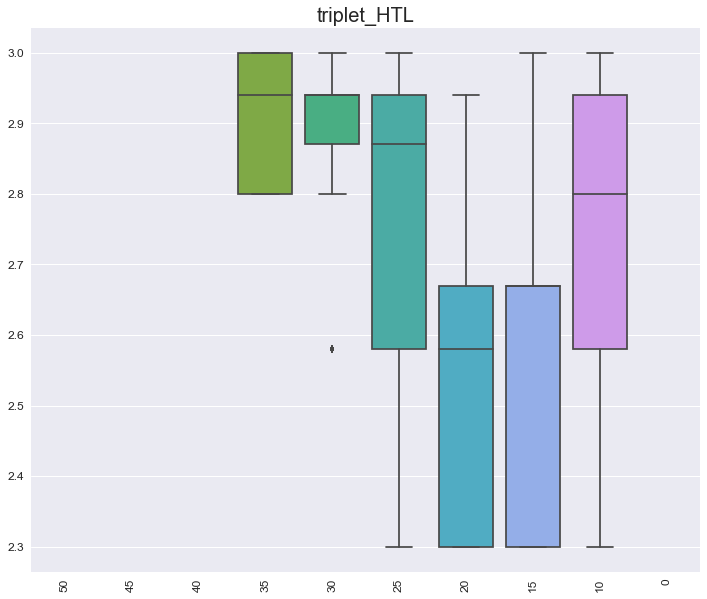

In [13]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,777.000000,14392.000000,9726.00000,3073.000000,7616.000000,5456.000000,0.0
mean,NaN,NaN,NaN,2.999678,2.884459,2.78743,2.883427,2.752139,2.602879,NaN
std,NaN,NaN,NaN,0.169828,0.253242,0.14768,0.247809,0.201342,0.098102,NaN
min,NaN,NaN,NaN,2.690000,2.690000,2.69000,2.500000,2.500000,2.500000,NaN
25%,NaN,NaN,NaN,2.990000,2.700000,2.70000,2.700000,2.600000,2.500000,NaN
50%,NaN,NaN,NaN,2.990000,2.760000,2.75000,2.750000,2.700000,2.600000,NaN
75%,NaN,NaN,NaN,2.990000,2.990000,2.76000,2.990000,2.760000,2.600000,NaN
max,NaN,NaN,NaN,3.400000,3.400000,3.40000,3.400000,3.400000,3.400000,NaN


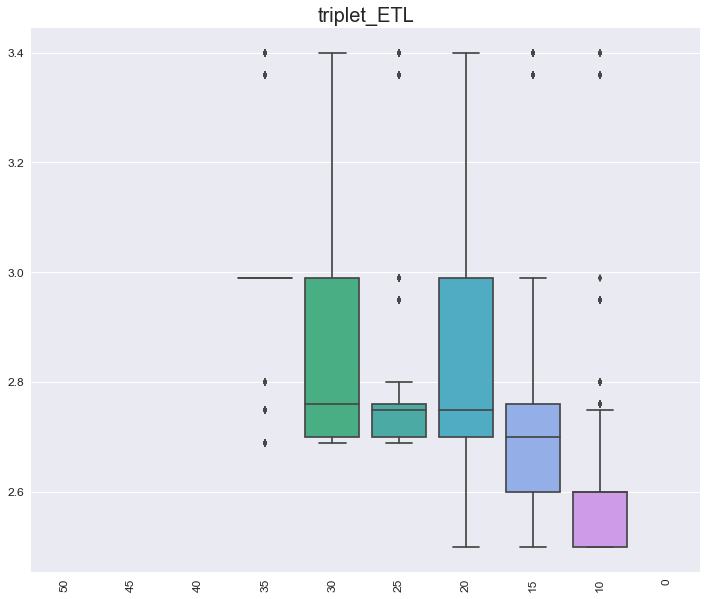

In [14]:
layer('triplet_ETL')

In [15]:
triplet3 = new_X.loc[new_X['triplet_HOST'] == 2.7]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,0.0,121.000000,5747.000000,19245.000000,8617.000000,5030.000000,0.0
mean,NaN,NaN,NaN,NaN,2.798017,2.850780,2.841000,2.548498,2.727048,NaN
std,NaN,NaN,NaN,NaN,0.033705,0.115144,0.167992,0.223294,0.230460,NaN
min,NaN,NaN,NaN,NaN,2.580000,2.300000,2.300000,2.300000,2.300000,NaN
25%,NaN,NaN,NaN,NaN,2.800000,2.800000,2.800000,2.300000,2.580000,NaN
50%,NaN,NaN,NaN,NaN,2.800000,2.800000,2.940000,2.670000,2.670000,NaN
75%,NaN,NaN,NaN,NaN,2.800000,2.940000,2.940000,2.670000,2.940000,NaN
max,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,NaN


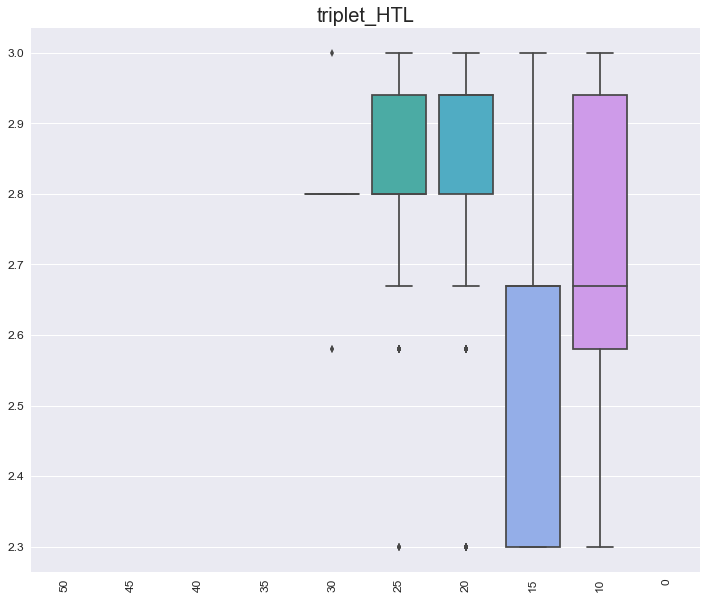

In [16]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,0.0,121.000000,5747.000000,19245.000000,8617.000000,5030.000000,0.0
mean,NaN,NaN,NaN,NaN,2.998264,2.906596,2.834888,2.757170,2.625499,NaN
std,NaN,NaN,NaN,NaN,0.100014,0.229768,0.219454,0.211931,0.138290,NaN
min,NaN,NaN,NaN,NaN,2.690000,2.690000,2.500000,2.500000,2.500000,NaN
25%,NaN,NaN,NaN,NaN,2.990000,2.740000,2.700000,2.600000,2.500000,NaN
50%,NaN,NaN,NaN,NaN,2.990000,2.800000,2.750000,2.700000,2.600000,NaN
75%,NaN,NaN,NaN,NaN,2.990000,2.990000,2.800000,2.800000,2.690000,NaN
max,NaN,NaN,NaN,NaN,3.400000,3.400000,3.400000,3.400000,3.400000,NaN


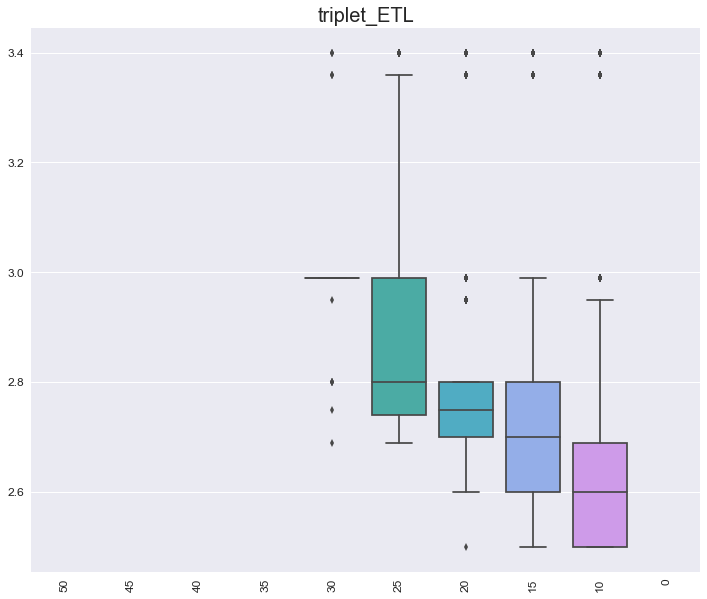

In [17]:
layer('triplet_ETL')

In [24]:
triplet3 = new_X.loc[(new_X['triplet_HOST'] == 2.64) | (new_X['triplet_HOST'] == 2.65) ]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,0.0,5.000000e+01,2816.000000,21794.000000,10987.000000,5392.000000,1.00
mean,NaN,NaN,NaN,NaN,2.800000e+00,2.823991,2.847224,2.599183,2.720391,2.67
std,NaN,NaN,NaN,NaN,4.485978e-16,0.101919,0.165283,0.234598,0.232814,NaN
min,NaN,NaN,NaN,NaN,2.800000e+00,2.300000,2.300000,2.300000,2.300000,2.67
25%,NaN,NaN,NaN,NaN,2.800000e+00,2.800000,2.800000,2.300000,2.580000,2.67
50%,NaN,NaN,NaN,NaN,2.800000e+00,2.800000,2.940000,2.670000,2.670000,2.67
75%,NaN,NaN,NaN,NaN,2.800000e+00,2.800000,2.940000,2.800000,2.940000,2.67
max,NaN,NaN,NaN,NaN,2.800000e+00,3.000000,3.000000,3.000000,3.000000,2.67


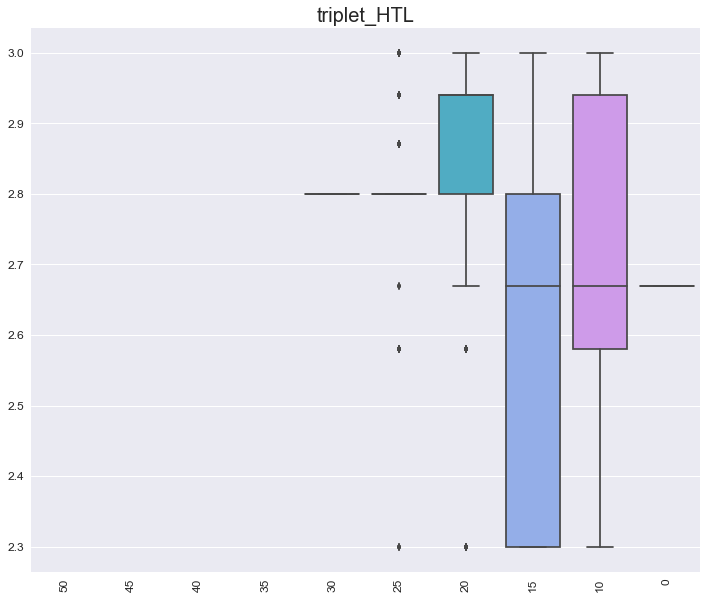

In [25]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,0.0,50.00,2816.000000,21794.000000,10987.000000,5392.000000,1.00
mean,NaN,NaN,NaN,NaN,2.99,2.917947,2.851602,2.758213,2.625243,2.75
std,NaN,NaN,NaN,NaN,0.00,0.213196,0.229393,0.198133,0.139155,NaN
min,NaN,NaN,NaN,NaN,2.99,2.690000,2.500000,2.500000,2.500000,2.75
25%,NaN,NaN,NaN,NaN,2.99,2.750000,2.700000,2.690000,2.500000,2.75
50%,NaN,NaN,NaN,NaN,2.99,2.950000,2.750000,2.740000,2.600000,2.75
75%,NaN,NaN,NaN,NaN,2.99,2.990000,2.950000,2.760000,2.690000,2.75
max,NaN,NaN,NaN,NaN,2.99,3.400000,3.400000,3.400000,3.400000,2.75


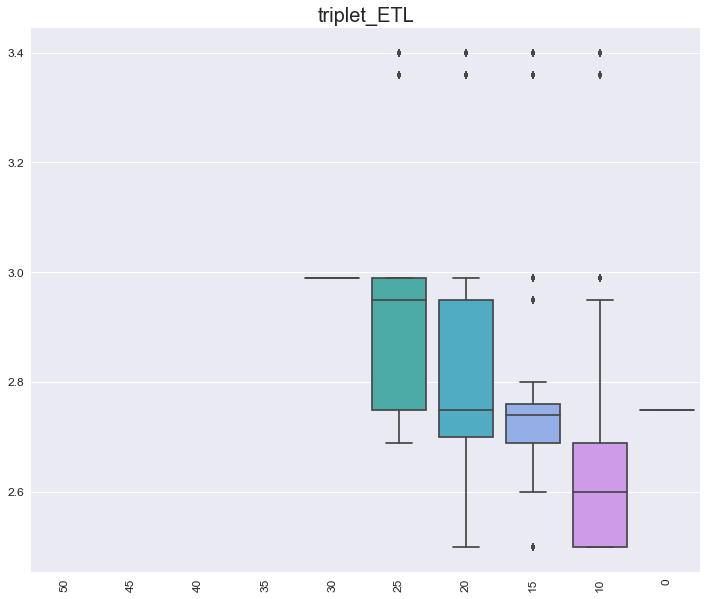

In [26]:
layer('triplet_ETL')

In [23]:
new_X['triplet_HOST'].value_counts()

2.90    45600
2.80    41040
2.70    38760
2.95    38760
3.00    38760
2.65    38760
2.75    38760
2.85    38760
2.94     6840
3.10     4560
2.93     4560
2.64     2280
2.91     2280
3.03     2280
2.79     2280
2.84     2280
2.86     2280
Name: triplet_HOST, dtype: int64

## 2nd HOMO energy

In [47]:
triplet3 = new_X.loc[(new_X['HOMO_EML'] == 5.56) | (new_X['HOMO_EML'] == 5.57)]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,494.000000,9213.000000,9264.000000,6396.000000,5284.000000,10384.000000,5.000000
mean,NaN,NaN,NaN,5.862753,5.809096,5.770186,5.766057,5.382324,5.357646,5.180000
std,NaN,NaN,NaN,0.183025,0.199798,0.191407,0.152980,0.342881,0.305564,0.044721
min,NaN,NaN,NaN,5.500000,5.500000,5.500000,5.500000,5.100000,5.100000,5.100000
25%,NaN,NaN,NaN,5.700000,5.700000,5.700000,5.700000,5.100000,5.100000,5.200000
50%,NaN,NaN,NaN,5.900000,5.700000,5.700000,5.800000,5.200000,5.200000,5.200000
75%,NaN,NaN,NaN,6.100000,5.900000,5.900000,5.800000,5.700000,5.700000,5.200000
max,NaN,NaN,NaN,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,5.200000


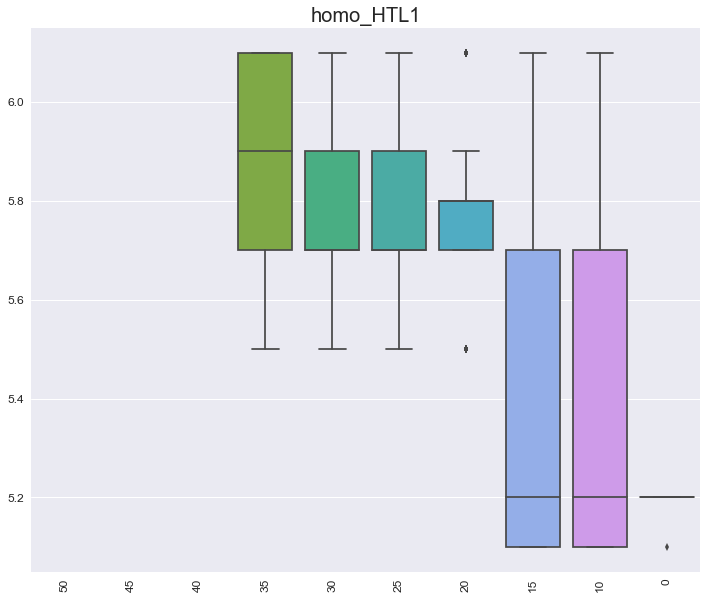

In [48]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,494.000000,9213.000000,9264.000000,6396.000000,5284.000000,10384.000000,5.000000
mean,NaN,NaN,NaN,7.222227,6.631096,6.428042,6.433049,6.607555,6.468847,6.148000
std,NaN,NaN,NaN,0.351259,0.390108,0.412614,0.379829,0.416761,0.359877,0.297439
min,NaN,NaN,NaN,6.500000,5.850000,5.850000,5.850000,5.850000,5.850000,6.010000
25%,NaN,NaN,NaN,6.800000,6.500000,6.020000,6.120000,6.300000,6.200000,6.010000
50%,NaN,NaN,NaN,7.500000,6.680000,6.500000,6.500000,6.560000,6.400000,6.020000
75%,NaN,NaN,NaN,7.500000,6.800000,6.680000,6.680000,6.800000,6.790000,6.020000
max,NaN,NaN,NaN,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,6.680000


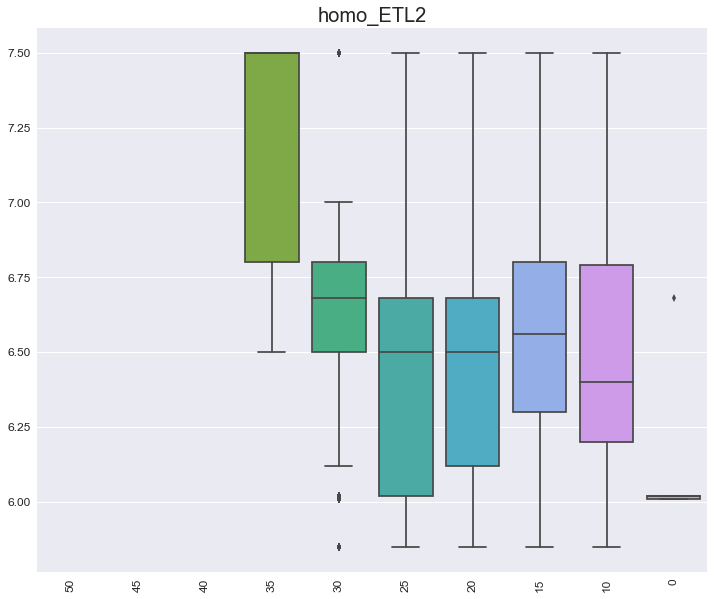

In [49]:
layer('homo_ETL2')

In [50]:
triplet3 = new_X.loc[new_X['HOMO_EML'] == 5.8]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,931.000000,15806.000000,13806.000000,10991.000000,12185.000000,7841.000000,0.0
mean,NaN,NaN,NaN,5.944468,5.810585,5.765377,5.587890,5.268149,5.572363,NaN
std,NaN,NaN,NaN,0.167072,0.196583,0.184312,0.293896,0.277660,0.314841,NaN
min,NaN,NaN,NaN,5.500000,5.500000,5.500000,5.100000,5.100000,5.100000,NaN
25%,NaN,NaN,NaN,5.900000,5.700000,5.700000,5.200000,5.100000,5.200000,NaN
50%,NaN,NaN,NaN,5.900000,5.700000,5.800000,5.700000,5.200000,5.700000,NaN
75%,NaN,NaN,NaN,6.100000,5.900000,5.900000,5.800000,5.200000,5.800000,NaN
max,NaN,NaN,NaN,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,NaN


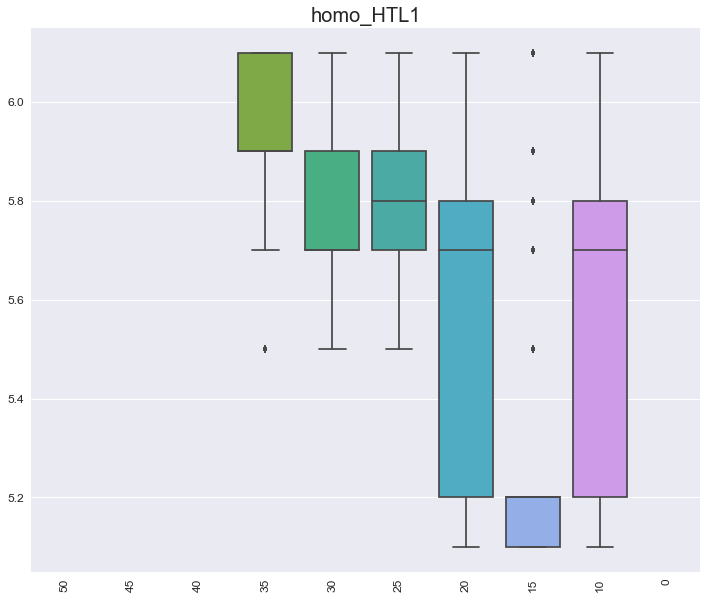

In [51]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,931.000000,15806.000000,13806.000000,10991.000000,12185.000000,7841.000000,0.0
mean,NaN,NaN,NaN,7.161096,6.618706,6.415375,6.517955,6.472860,6.484587,NaN
std,NaN,NaN,NaN,0.376842,0.387532,0.413791,0.413112,0.377801,0.349448,NaN
min,NaN,NaN,NaN,6.300000,5.850000,5.850000,5.850000,5.850000,5.850000,NaN
25%,NaN,NaN,NaN,6.800000,6.300000,6.020000,6.120000,6.130000,6.200000,NaN
50%,NaN,NaN,NaN,7.500000,6.670000,6.500000,6.560000,6.500000,6.400000,NaN
75%,NaN,NaN,NaN,7.500000,6.800000,6.680000,6.800000,6.790000,7.000000,NaN
max,NaN,NaN,NaN,7.500000,7.500000,7.500000,7.500000,7.500000,7.000000,NaN


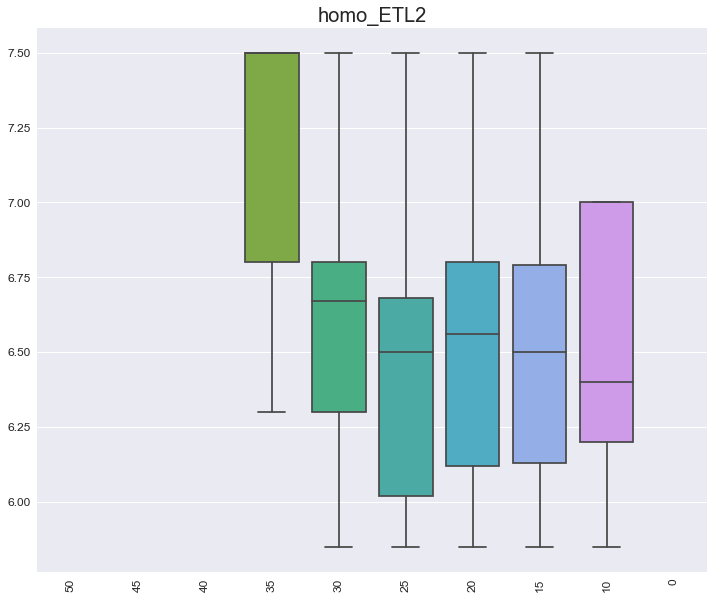

In [52]:
layer('homo_ETL2')

In [53]:
triplet3 = new_X.loc[(new_X['HOMO_EML'] == 5.9) | (new_X['HOMO_EML'] == 5.92 ) | (new_X['HOMO_EML'] == 6.06 )]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,1048.000000,25812.000000,32052.000000,22656.000000,26461.000000,15091.000000,0.0
mean,NaN,NaN,NaN,5.979008,5.830699,5.759297,5.626002,5.284169,5.559466,NaN
std,NaN,NaN,NaN,0.147368,0.194294,0.185858,0.282277,0.286819,0.317006,NaN
min,NaN,NaN,NaN,5.500000,5.500000,5.500000,5.100000,5.100000,5.100000,NaN
25%,NaN,NaN,NaN,5.900000,5.700000,5.700000,5.500000,5.100000,5.200000,NaN
50%,NaN,NaN,NaN,6.100000,5.900000,5.700000,5.700000,5.200000,5.700000,NaN
75%,NaN,NaN,NaN,6.100000,6.100000,5.900000,5.800000,5.200000,5.800000,NaN
max,NaN,NaN,NaN,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,NaN


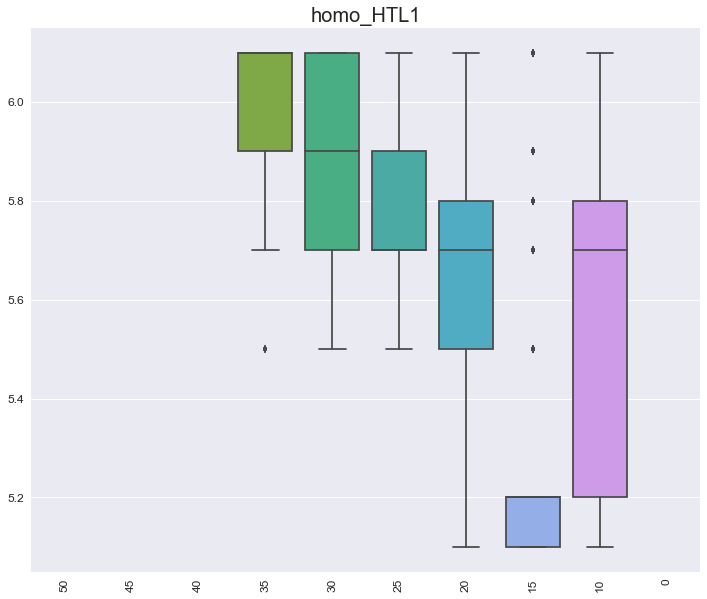

In [54]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,1048.000000,25812.000000,32052.000000,22656.000000,26461.000000,15091.000000,0.0
mean,NaN,NaN,NaN,7.263321,6.694422,6.416623,6.487191,6.494638,6.461866,NaN
std,NaN,NaN,NaN,0.341703,0.380078,0.399723,0.411898,0.381297,0.352073,NaN
min,NaN,NaN,NaN,6.500000,5.850000,5.850000,5.850000,5.850000,5.850000,NaN
25%,NaN,NaN,NaN,6.800000,6.500000,6.120000,6.120000,6.130000,6.200000,NaN
50%,NaN,NaN,NaN,7.500000,6.680000,6.500000,6.500000,6.500000,6.400000,NaN
75%,NaN,NaN,NaN,7.500000,6.800000,6.670000,6.790000,6.790000,7.000000,NaN
max,NaN,NaN,NaN,7.500000,7.500000,7.500000,7.500000,7.500000,7.000000,NaN


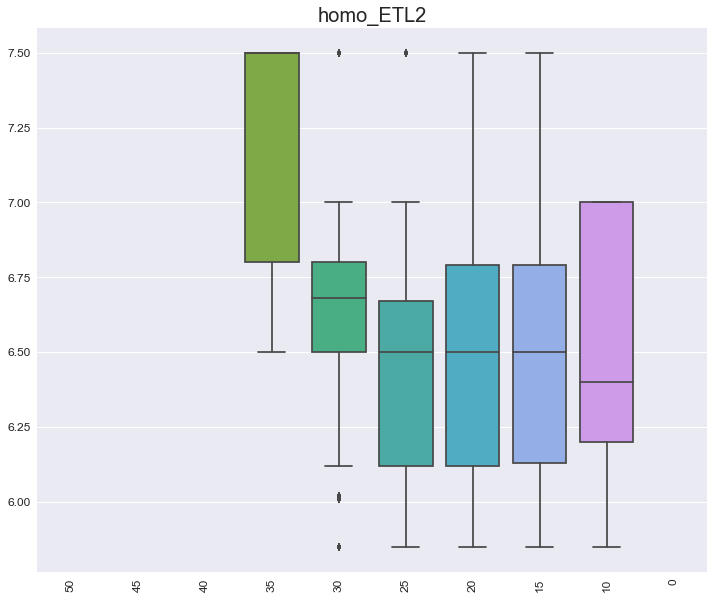

In [55]:
layer('homo_ETL2')

## 3rd LUMO energy

In [56]:
triplet3 = new_X.loc[(new_X['HOMO_EML'] == 5.56) | (new_X['HOMO_EML'] == 5.57 )]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,494.000000,9213.000000,9264.000000,6396.000000,5284.000000,10384.000000,5.00
mean,NaN,NaN,NaN,2.109474,2.076789,2.062832,2.068609,2.078213,2.065195,2.02
std,NaN,NaN,NaN,0.030720,0.049540,0.049486,0.049985,0.049325,0.049771,0.00
min,NaN,NaN,NaN,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.02
25%,NaN,NaN,NaN,2.120000,2.020000,2.020000,2.020000,2.020000,2.020000,2.02
50%,NaN,NaN,NaN,2.120000,2.120000,2.020000,2.020000,2.120000,2.020000,2.02
75%,NaN,NaN,NaN,2.120000,2.120000,2.120000,2.120000,2.120000,2.120000,2.02
max,NaN,NaN,NaN,2.120000,2.120000,2.120000,2.120000,2.120000,2.120000,2.02


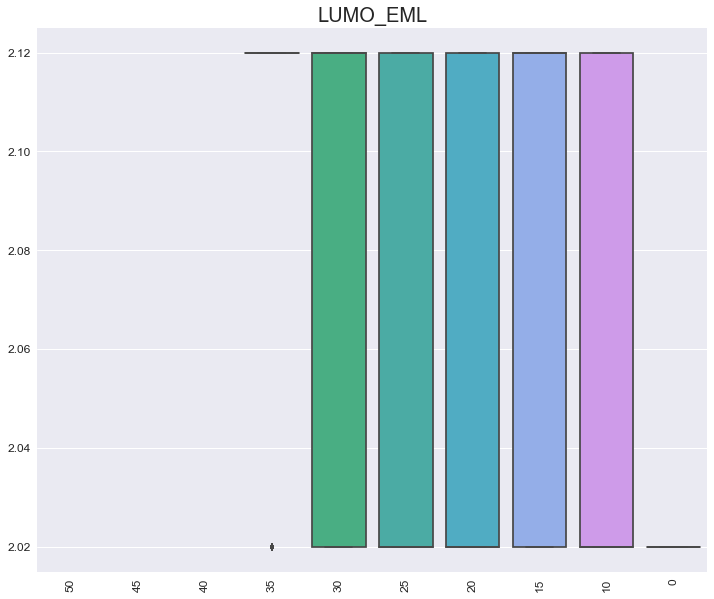

In [57]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,494.000000,9213.000000,9264.000000,6396.000000,5284.000000,10384.000000,5.000000
mean,NaN,NaN,NaN,3.123927,2.750988,2.812816,2.787109,2.887651,2.935964,2.850000
std,NaN,NaN,NaN,0.438583,0.320666,0.301860,0.277161,0.362155,0.319913,0.067082
min,NaN,NaN,NaN,2.500000,2.260000,2.260000,2.260000,2.260000,2.260000,2.730000
25%,NaN,NaN,NaN,2.600000,2.520000,2.700000,2.600000,2.600000,2.730000,2.880000
50%,NaN,NaN,NaN,3.470000,2.700000,2.750000,2.730000,2.800000,2.880000,2.880000
75%,NaN,NaN,NaN,3.470000,2.750000,2.910000,2.880000,3.200000,3.000000,2.880000
max,NaN,NaN,NaN,3.470000,3.470000,3.470000,3.470000,3.500000,3.500000,2.880000


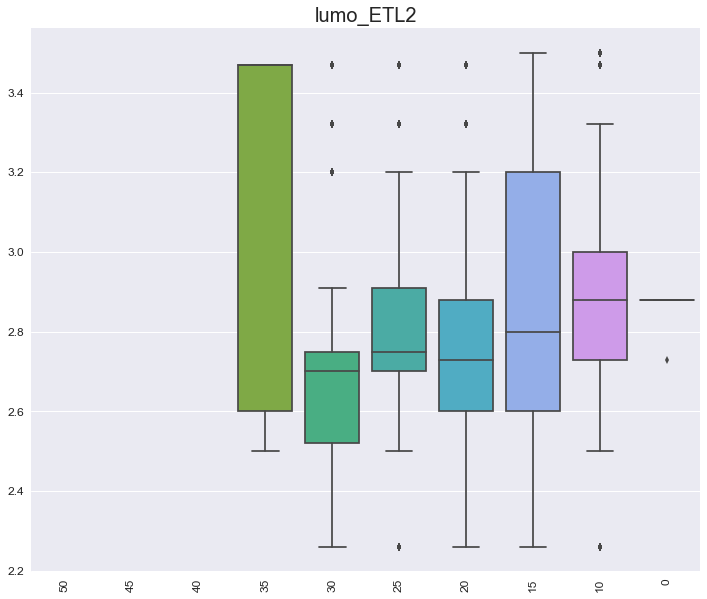

In [58]:
layer('lumo_ETL2')

In [59]:
triplet3 = new_X.loc[new_X['HOMO_EML'] == 5.8]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,931.000000,15806.000000,13806.000000,10991.000000,12185.000000,7841.000000,0.0
mean,NaN,NaN,NaN,2.273792,2.273334,2.273220,2.273518,2.273374,2.273154,NaN
std,NaN,NaN,NaN,0.023712,0.024834,0.025113,0.024947,0.024883,0.025109,NaN
min,NaN,NaN,NaN,2.240000,2.240000,2.240000,2.240000,2.240000,2.240000,NaN
25%,NaN,NaN,NaN,2.240000,2.240000,2.240000,2.240000,2.240000,2.240000,NaN
50%,NaN,NaN,NaN,2.280000,2.280000,2.280000,2.280000,2.280000,2.280000,NaN
75%,NaN,NaN,NaN,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN
max,NaN,NaN,NaN,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN


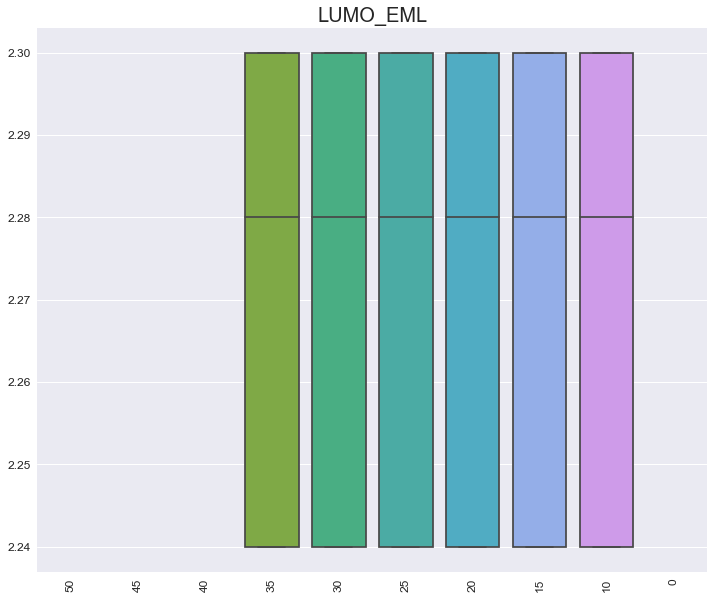

In [60]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,931.000000,15806.000000,13806.000000,10991.000000,12185.000000,7841.000000,0.0
mean,NaN,NaN,NaN,3.075005,2.755228,2.817847,2.789506,2.850555,3.072231,NaN
std,NaN,NaN,NaN,0.437568,0.315510,0.304105,0.300135,0.323363,0.288170,NaN
min,NaN,NaN,NaN,2.500000,2.260000,2.260000,2.260000,2.260000,2.260000,NaN
25%,NaN,NaN,NaN,2.600000,2.520000,2.700000,2.520000,2.700000,2.800000,NaN
50%,NaN,NaN,NaN,3.470000,2.700000,2.750000,2.730000,2.800000,3.000000,NaN
75%,NaN,NaN,NaN,3.470000,2.750000,2.910000,2.880000,3.000000,3.500000,NaN
max,NaN,NaN,NaN,3.470000,3.470000,3.470000,3.470000,3.500000,3.500000,NaN


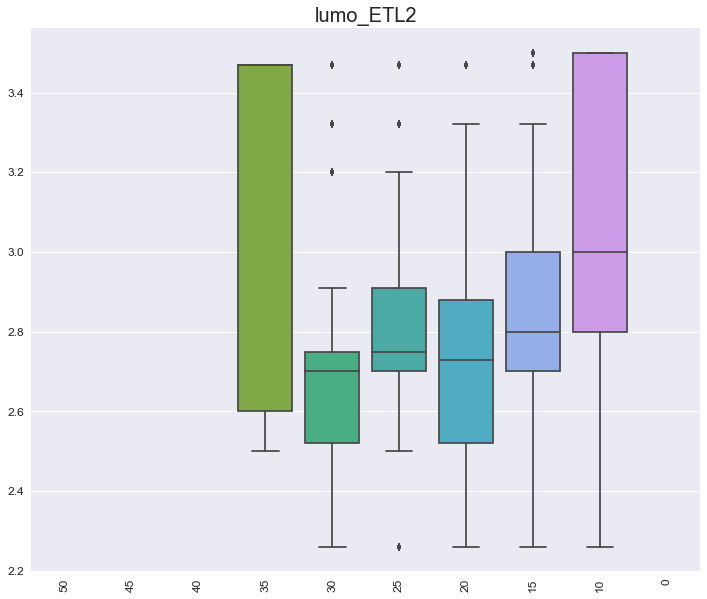

In [61]:
layer('lumo_ETL2')

In [62]:
triplet3 = new_X.loc[(new_X['HOMO_EML'] == 5.9) | (new_X['HOMO_EML'] == 5.92 ) | (new_X['HOMO_EML'] == 6.06 )]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 20) & (new_X[column] < 25)]
device15 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 20)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,1048.000000,25812.000000,32052.000000,22656.000000,26461.000000,15091.000000,0.0
mean,NaN,NaN,NaN,2.549275,2.546096,2.539207,2.549583,2.553198,2.533876,NaN
std,NaN,NaN,NaN,0.222219,0.216898,0.213742,0.220386,0.220528,0.208951,NaN
min,NaN,NaN,NaN,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,NaN
25%,NaN,NaN,NaN,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,NaN
50%,NaN,NaN,NaN,2.400000,2.400000,2.400000,2.550000,2.550000,2.400000,NaN
75%,NaN,NaN,NaN,2.670000,2.670000,2.670000,2.670000,2.670000,2.670000,NaN
max,NaN,NaN,NaN,2.950000,2.950000,2.950000,2.950000,2.950000,2.950000,NaN


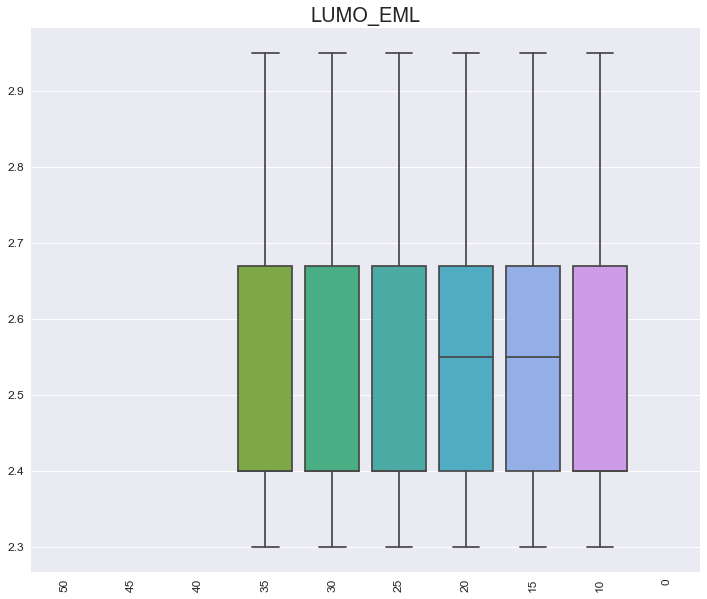

In [63]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,15,10,0
count,0.0,0.0,0.0,1048.000000,25812.000000,32052.000000,22656.000000,26461.000000,15091.000000,0.0
mean,NaN,NaN,NaN,3.185487,2.766813,2.803924,2.785055,2.862718,3.056172,NaN
std,NaN,NaN,NaN,0.413351,0.328851,0.304276,0.293368,0.330609,0.289244,NaN
min,NaN,NaN,NaN,2.500000,2.260000,2.260000,2.260000,2.260000,2.260000,NaN
25%,NaN,NaN,NaN,2.600000,2.520000,2.700000,2.600000,2.700000,2.800000,NaN
50%,NaN,NaN,NaN,3.470000,2.700000,2.750000,2.730000,2.800000,3.000000,NaN
75%,NaN,NaN,NaN,3.470000,2.750000,2.910000,2.880000,3.000000,3.500000,NaN
max,NaN,NaN,NaN,3.470000,3.470000,3.470000,3.470000,3.500000,3.500000,NaN


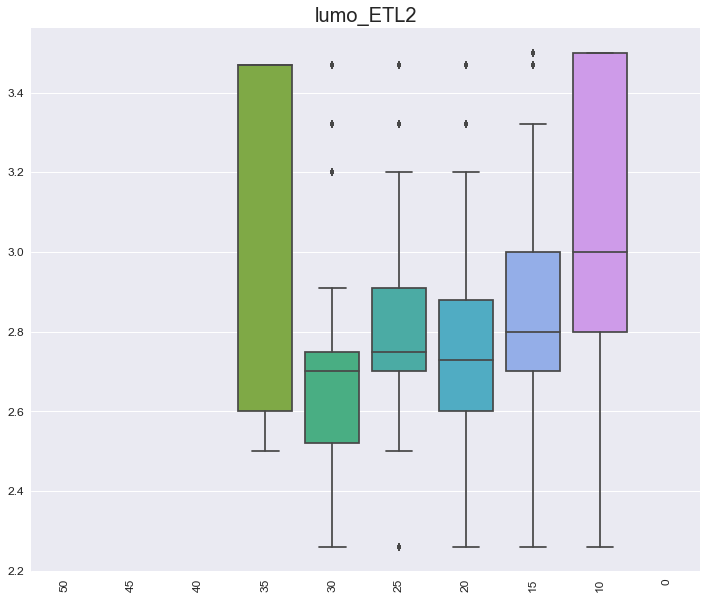

In [64]:
layer('lumo_ETL2')